## Game of chance

### Dr. Tirthajyoti Sarkar, Fremont, CA, May 2019

Two players play a turn-based game. The player who deals first wins the game with a 90% probability and gets to choose the dealer for the next game.

Any rational person would choose herself as the dealer to maximize the chance of winning the next game too.

Player 'A' gets the first chance of the first game. Obviously, player 'B' is at a disadvantage.

But is she?

**What happens if this game is played infinite times?**

Can we simulate the game outcomes and show that this **game is symmetric in the limit of infinite repetition** i.e. no matter which players starts the game, for a large number of repeated plays, they both win the almost same number of games?

<br>
![game_of_chance](https://www.gamerbolt.com/wp-content/uploads/2017/11/dice-780x405.png)

In [1]:
from random import randint
from matplotlib.pyplot import plot

In [2]:
n_games = 1000
A_wins=0
B_wins=0
A_deals=True
B_deals=False

### Simulate a game with the given probability and assuming that the winner of a game keeps herself as the dealer for the next game

In [3]:
for i in range(n_games):
    if A_deals:
        rv = randint(1,10)
        if rv < 10:
            A_wins+=1
            A_deals = True
            B_deals=False
        else:
            B_wins+=1  
            B_deals=True
            A_deals=False
    if B_deals:
        rv = randint(1,10)
        if rv < 10:
            B_wins+=1
            B_deals = True
            A_deals=False
        else:
            A_wins+=1  
            A_deals=True
            B_deals=False

### Print the number of total wins. If the number of games is large (on the order of thousand) then the win numbers should be close to each other

In [4]:
print(A_wins)
print(B_wins)

477
579


### Define a function to simulate the game for a given number of times

In [5]:
def play_game(n_games,A_first=True,B_first=False):
    """
    Simulates a game play for a certain number of times and computes the number of wins for the players
    """
    A_wins=0
    B_wins=0
    A_deals=A_first
    B_deals=B_first
    for i in range(int(n_games)):
        if A_deals:
            rv = randint(1,10)
            if rv < 10:
                A_wins+=1
                A_deals = True
                B_deals=False
            else:
                B_wins+=1  
                B_deals=True
                A_deals=False
        if B_deals:
            rv = randint(1,10)
            if rv < 10:
                B_wins+=1
                B_deals = True
                A_deals=False
            else:
                A_wins+=1  
                A_deals=True
                B_deals=False
    
    return (A_wins,B_wins)

In [6]:
play_game(1000)

(572, 486)

### Run the game using `play_game` function over a range of repetition and plot the A/B winning ratio. Initially the ratio will be random but it should tend to one as the number of repetitions grow

In [7]:
a_b_ratio=[]
for i in range(40):
    a,b = play_game(10**(1+i/8))
    if b!=0:
        a_b_ratio.append(a/b)
    else:
        a_b_ratio.append(a/(b+1))

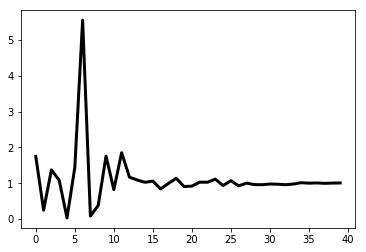

In [8]:
plot(a_b_ratio,color='k',linewidth=3)